In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import datetime as dt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.svm import SVR

In [ ]:
internet = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Project/Data/ClearedData/Technology/IndividualUsingInternet.csv", sep=',')
computer = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Project/Data/ClearedData/Technology/Access to computers from home.csv", sep=',')
RandD = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Project/Data/ClearedData/Technology/R&D expenditure by insudtry.csv", sep=',')

In [ ]:
internet = internet.dropna()
internet = internet.iloc[:,1:]
internet.head()

,country,date,value
30,ABW,1990,0.0
31,ABW,1991,0.0
32,ABW,1992,0.0
33,ABW,1993,0.0
34,ABW,1994,0.0


In [ ]:
computer = computer.dropna()
computer.head()

,country,date,Value
0,DNK,2006,84.9749
1,DNK,2007,82.9604
2,DNK,2008,85.4588
3,DNK,2009,86.2344
4,DNK,2010,88.0249


In [ ]:
RandD = RandD.dropna()
RandD.head()

,country,date,Unit Code,Unit,PowerCode,Value
0,AUS,2006,AUD,Australian Dollar,Millions,12639.3
1,AUS,2007,AUD,Australian Dollar,Millions,15047.4
2,AUS,2008,AUD,Australian Dollar,Millions,17291.2
3,AUS,2009,AUD,Australian Dollar,Millions,16759.6
4,AUS,2010,AUD,Australian Dollar,Millions,18006.9


In [ ]:
covid = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Project/Data/ClearedData/Health/COVID.csv", sep=',')
ebola = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Project/Data/ClearedData/Health/EBOLA.csv", sep=',')
health_exp = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Project/Data/ClearedData/Health/HealthExpenditure.csv", sep=',')
hiv = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Project/Data/ClearedData/Health/HIV.csv", sep=',')
life_exp = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Project/Data/ClearedData/Health/LifeExpectancy.csv", sep=',')

In [ ]:
covid = covid.fillna(0)
covid = covid.drop(columns=['Date'],axis = 1)
covid.rename(columns = {'Unnamed: 2':'Date'}, inplace=True) 
covid['year'] = pd.DatetimeIndex(covid['Date']).year
covid.head()

,CountryCode,Date,C1_School closing,C1_Flag,C2_Workplace closing,C2_Flag,C3_Cancel public events,C3_Flag,C4_Restrictions on gatherings,C4_Flag,C5_Close public transport,C5_Flag,C6_Stay at home requirements,C6_Flag,C7_Restrictions on internal movement,C7_Flag,C8_International travel controls,E1_Income support,E1_Flag,E2_Debt/contract relief,E3_Fiscal measures,E4_International support,H1_Public information campaigns,H1_Flag,H2_Testing policy,H3_Contact tracing,H4_Emergency investment in healthcare,H5_Investment in vaccines,H6_Facial Coverings,H6_Flag,H7_Vaccination policy,H7_Flag,H8_Protection of elderly people,H8_Flag,M1_Wildcard,ConfirmedCases,ConfirmedDeaths,StringencyIndex,StringencyIndexForDisplay,StringencyLegacyIndex,StringencyLegacyIndexForDisplay,GovernmentResponseIndex,GovernmentResponseIndexForDisplay,ContainmentHealthIndex,ContainmentHealthIndexForDisplay,EconomicSupportIndex,EconomicSupportIndexForDisplay,year
0,ABW,2020/1/1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020
1,ABW,2020/1/2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020
2,ABW,2020/1/3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020
3,ABW,2020/1/4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020
4,ABW,2020/1/5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020


In [ ]:
covid.shape

(135723, 48)

In [ ]:
ebola = ebola.fillna(0)
ebola['year'] = pd.DatetimeIndex(ebola['date']).year
ebola = ebola.drop(columns=['Unnamed: 0'], axis =1)
ebola.head()

,country,cases,deaths,date,year
0,GIN,0.0,0.0,6/1/2020,2020
1,GIN,0.0,0.0,8/1/2018,2018
2,GIN,0.0,0.0,7/1/2018,2018
3,GIN,0.0,0.0,8/2/2017,2017
4,GIN,3814.0,2544.0,4/13/2016,2016


In [ ]:
health_exp = health_exp[['fact_id', 'dataset', 'effective_date', 'end_date', 'published', 'value', 'value.low', 'value.high', 'year', 'country', 'region', 'geometry']]
health_exp = health_exp.dropna()
health_exp.head()

,fact_id,dataset,effective_date,end_date,published,value,value.low,value.high,year,country,region,geometry
0,23074509,CYCU,2020-07-09,2900-12-31,True,1500.0,830.0,3600.0,2000,AFG,EMR,POINT (66.0084474495393 33.8362669104371)
2,23074511,CYCU,2020-07-09,2900-12-31,True,2000.0,1400.0,2800.0,2000,DZA,AFR,POINT (2.653091376797363 28.14888965733068)
3,23074512,CYCU,2020-07-09,2900-12-31,True,75000.0,60000.0,91000.0,2000,AGO,AFR,POINT (17.53698497377595 -12.29231564327222)
4,23074513,CYCU,2020-07-09,2900-12-31,True,59000.0,50000.0,70000.0,2000,ARG,AMR,POINT (-65.17819055279375 -35.38755104141164)
5,23074514,CYCU,2020-07-09,2900-12-31,True,960.0,530.0,1700.0,2000,ARM,EUR,POINT (44.93230121812852 40.28813415391145)


In [ ]:
hiv = hiv[['fact_id', 'dataset', 'effective_date', 'end_date', 'published', 'value.numeric', 'value.low', 'value.high', 'year', 'country', 'region', 'lat', 'lng']]
hiv = hiv.dropna()
hiv.head()

,fact_id,dataset,effective_date,end_date,published,value.numeric,value.low,value.high,year,country,region,lat,lng
0,23074509,CYCU,2020-07-09,2900-12-31,True,1500.0,830.0,3600.0,2000,AFG,EMR,66.008447,33.836267
2,23074511,CYCU,2020-07-09,2900-12-31,True,2000.0,1400.0,2800.0,2000,DZA,AFR,2.653091,28.148890
3,23074512,CYCU,2020-07-09,2900-12-31,True,75000.0,60000.0,91000.0,2000,AGO,AFR,17.536985,-12.292316
4,23074513,CYCU,2020-07-09,2900-12-31,True,59000.0,50000.0,70000.0,2000,ARG,AMR,-65.178191,-35.387551
5,23074514,CYCU,2020-07-09,2900-12-31,True,960.0,530.0,1700.0,2000,ARM,EUR,44.932301,40.288134


In [ ]:
life_exp = life_exp.fillna(0)
life_exp.head()

,Entity,country,date,value
0,Afghanistan,AFG,1950,27.638
1,Afghanistan,AFG,1951,27.878
2,Afghanistan,AFG,1952,28.361
3,Afghanistan,AFG,1953,28.852
4,Afghanistan,AFG,1954,29.350


In [ ]:
tech_vals = [internet['value'], computer['Value'], RandD['Value'], internet['date'], computer['date'], RandD['date']]
tech_head = ['Internet Users', 'Home Computer Users', 'R & D Expenditure', 'date_i', 'date_c', 'date_r']
tech = pd.concat(tech_vals, axis = 1, keys = tech_head)
tech.dropna(inplace=True)
tech.head(50)

,Internet Users,Home Computer Users,R & D Expenditure,date_i,date_c,date_r
30,0.000000,80.8000,183.800,1990.0,2006.0,2009.0
31,0.000000,85.0000,184.100,1991.0,2007.0,2010.0
32,0.000000,85.9000,189.700,1992.0,2008.0,2011.0
33,0.000000,87.2000,242.700,1993.0,2009.0,2013.0
34,0.000000,83.4000,248.100,1994.0,2010.0,2015.0
35,0.000000,80.0000,313.600,1995.0,2011.0,2017.0
36,2.768380,77.9000,88.395,1996.0,2012.0,2006.0
37,2.768380,81.7000,83.221,1997.0,2013.0,2007.0
38,2.768380,78.0000,98.913,1998.0,2014.0,2008.0
39,4.506180,76.8000,127.510,1999.0,2015.0,2009.0


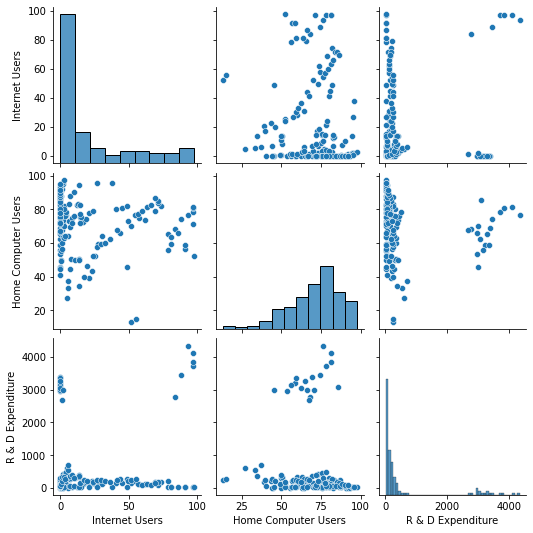

In [ ]:
sns.pairplot(tech.iloc[:,:3], kind="scatter")
plt.show()

In [ ]:
#fig, ax = plt.subplots()
#ax.plot(tech['date_i'], tech['Internet Users'])
#urbpop= internet[['date','value']] 
#urbpopwide=urbpop.pivot(index='date', columns = None ,values='value')
#urbpopwide.plot.line(title='Percent of Total Population living in Urban Areas')
#plt.show()

PCA on the COVID dataset

In [ ]:
covid.shape

(135723, 48)

In [ ]:
covid.head()

,CountryCode,Date,C1_School closing,C1_Flag,C2_Workplace closing,C2_Flag,C3_Cancel public events,C3_Flag,C4_Restrictions on gatherings,C4_Flag,C5_Close public transport,C5_Flag,C6_Stay at home requirements,C6_Flag,C7_Restrictions on internal movement,C7_Flag,C8_International travel controls,E1_Income support,E1_Flag,E2_Debt/contract relief,E3_Fiscal measures,E4_International support,H1_Public information campaigns,H1_Flag,H2_Testing policy,H3_Contact tracing,H4_Emergency investment in healthcare,H5_Investment in vaccines,H6_Facial Coverings,H6_Flag,H7_Vaccination policy,H7_Flag,H8_Protection of elderly people,H8_Flag,M1_Wildcard,ConfirmedCases,ConfirmedDeaths,StringencyIndex,StringencyIndexForDisplay,StringencyLegacyIndex,StringencyLegacyIndexForDisplay,GovernmentResponseIndex,GovernmentResponseIndexForDisplay,ContainmentHealthIndex,ContainmentHealthIndexForDisplay,EconomicSupportIndex,EconomicSupportIndexForDisplay,year
0,ABW,2020/1/1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020
1,ABW,2020/1/2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020
2,ABW,2020/1/3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020
3,ABW,2020/1/4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020
4,ABW,2020/1/5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020


In [ ]:
t_vals = [covid.iloc[:,2:35], covid.iloc[:,37:47]]
X_covid= pd.concat(t_vals, axis = 1)
X_covid.head()

,C1_School closing,C1_Flag,C2_Workplace closing,C2_Flag,C3_Cancel public events,C3_Flag,C4_Restrictions on gatherings,C4_Flag,C5_Close public transport,C5_Flag,C6_Stay at home requirements,C6_Flag,C7_Restrictions on internal movement,C7_Flag,C8_International travel controls,E1_Income support,E1_Flag,E2_Debt/contract relief,E3_Fiscal measures,E4_International support,H1_Public information campaigns,H1_Flag,H2_Testing policy,H3_Contact tracing,H4_Emergency investment in healthcare,H5_Investment in vaccines,H6_Facial Coverings,H6_Flag,H7_Vaccination policy,H7_Flag,H8_Protection of elderly people,H8_Flag,M1_Wildcard,StringencyIndex,StringencyIndexForDisplay,StringencyLegacyIndex,StringencyLegacyIndexForDisplay,GovernmentResponseIndex,GovernmentResponseIndexForDisplay,ContainmentHealthIndex,ContainmentHealthIndexForDisplay,EconomicSupportIndex,EconomicSupportIndexForDisplay
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
y1_covid_cases = covid[['ConfirmedCases']]
y1_covid_cases

,ConfirmedCases
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
135718,0.0
135719,0.0
135720,0.0
135721,0.0


In [ ]:
y2_covid_death = covid[['ConfirmedDeaths']]
y2_covid_death

,ConfirmedDeaths
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
135718,0.0
135719,0.0
135720,0.0
135721,0.0


In [ ]:
sc = StandardScaler()
X_covid = sc.fit_transform(X_covid)
y1_covid_cases = sc.fit_transform(y1_covid_cases)
y2_covid_death = sc.fit_transform(y2_covid_death)

In [ ]:
pca = PCA(n_components=20)
X_covid_pca = pca.fit_transform(X_covid)

In [ ]:
X_covid_pca = pd.DataFrame(data = X_covid_pca
             , columns = ['principal component 1', 'principal component 2','principal component 3', 'principal component 4','principal component 5', 'principal component 6','principal component 7', 'principal component 8','principal component 9', 'principal component 10',
                          'principal component 11', 'principal component 12','principal component 13', 'principal component 14','principal component 15', 'principal component 16','principal component 17', 'principal component 18','principal component 19', 'principal component 20'])
X_covid_pca.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10,principal component 11,principal component 12,principal component 13,principal component 14,principal component 15,principal component 16,principal component 17,principal component 18,principal component 19,principal component 20
0,8.984829,-0.281724,-0.264211,1.147114,-0.534014,0.813897,-0.525032,0.019949,-0.112548,0.614451,-0.550423,0.114146,-0.093955,-0.283518,-0.031674,-0.003565,0.222619,-0.178949,0.046822,0.119614
1,8.984829,-0.281724,-0.264211,1.147114,-0.534014,0.813897,-0.525032,0.019949,-0.112548,0.614451,-0.550423,0.114146,-0.093955,-0.283518,-0.031674,-0.003565,0.222619,-0.178949,0.046822,0.119614
2,8.984829,-0.281724,-0.264211,1.147114,-0.534014,0.813897,-0.525032,0.019949,-0.112548,0.614451,-0.550423,0.114146,-0.093955,-0.283518,-0.031674,-0.003565,0.222619,-0.178949,0.046822,0.119614
3,8.984829,-0.281724,-0.264211,1.147114,-0.534014,0.813897,-0.525032,0.019949,-0.112548,0.614451,-0.550423,0.114146,-0.093955,-0.283518,-0.031674,-0.003565,0.222619,-0.178949,0.046822,0.119614
4,8.984829,-0.281724,-0.264211,1.147114,-0.534014,0.813897,-0.525032,0.019949,-0.112548,0.614451,-0.550423,0.114146,-0.093955,-0.283518,-0.031674,-0.003565,0.222619,-0.178949,0.046822,0.119614


In [ ]:
cases_ = pd.concat([X_covid_pca, pd.DataFrame(y1_covid_cases, columns=['cases'])], axis = 1)
cases_.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10,principal component 11,principal component 12,principal component 13,principal component 14,principal component 15,principal component 16,principal component 17,principal component 18,principal component 19,principal component 20,cases
0,8.984829,-0.281724,-0.264211,1.147114,-0.534014,0.813897,-0.525032,0.019949,-0.112548,0.614451,-0.550423,0.114146,-0.093955,-0.283518,-0.031674,-0.003565,0.222619,-0.178949,0.046822,0.119614,-0.185604
1,8.984829,-0.281724,-0.264211,1.147114,-0.534014,0.813897,-0.525032,0.019949,-0.112548,0.614451,-0.550423,0.114146,-0.093955,-0.283518,-0.031674,-0.003565,0.222619,-0.178949,0.046822,0.119614,-0.185604
2,8.984829,-0.281724,-0.264211,1.147114,-0.534014,0.813897,-0.525032,0.019949,-0.112548,0.614451,-0.550423,0.114146,-0.093955,-0.283518,-0.031674,-0.003565,0.222619,-0.178949,0.046822,0.119614,-0.185604
3,8.984829,-0.281724,-0.264211,1.147114,-0.534014,0.813897,-0.525032,0.019949,-0.112548,0.614451,-0.550423,0.114146,-0.093955,-0.283518,-0.031674,-0.003565,0.222619,-0.178949,0.046822,0.119614,-0.185604
4,8.984829,-0.281724,-0.264211,1.147114,-0.534014,0.813897,-0.525032,0.019949,-0.112548,0.614451,-0.550423,0.114146,-0.093955,-0.283518,-0.031674,-0.003565,0.222619,-0.178949,0.046822,0.119614,-0.185604


In [ ]:
death_ = pd.concat([X_covid_pca, pd.DataFrame(y2_covid_death, columns=['deaths'])], axis = 1)
death_.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10,principal component 11,principal component 12,principal component 13,principal component 14,principal component 15,principal component 16,principal component 17,principal component 18,principal component 19,principal component 20,deaths
0,8.984829,-0.281724,-0.264211,1.147114,-0.534014,0.813897,-0.525032,0.019949,-0.112548,0.614451,-0.550423,0.114146,-0.093955,-0.283518,-0.031674,-0.003565,0.222619,-0.178949,0.046822,0.119614,-0.220549
1,8.984829,-0.281724,-0.264211,1.147114,-0.534014,0.813897,-0.525032,0.019949,-0.112548,0.614451,-0.550423,0.114146,-0.093955,-0.283518,-0.031674,-0.003565,0.222619,-0.178949,0.046822,0.119614,-0.220549
2,8.984829,-0.281724,-0.264211,1.147114,-0.534014,0.813897,-0.525032,0.019949,-0.112548,0.614451,-0.550423,0.114146,-0.093955,-0.283518,-0.031674,-0.003565,0.222619,-0.178949,0.046822,0.119614,-0.220549
3,8.984829,-0.281724,-0.264211,1.147114,-0.534014,0.813897,-0.525032,0.019949,-0.112548,0.614451,-0.550423,0.114146,-0.093955,-0.283518,-0.031674,-0.003565,0.222619,-0.178949,0.046822,0.119614,-0.220549
4,8.984829,-0.281724,-0.264211,1.147114,-0.534014,0.813897,-0.525032,0.019949,-0.112548,0.614451,-0.550423,0.114146,-0.093955,-0.283518,-0.031674,-0.003565,0.222619,-0.178949,0.046822,0.119614,-0.220549


In [ ]:
pca.explained_variance_ratio_

array([0.46211091, 0.06958275, 0.04473638, 0.03797589, 0.03542454,
       0.03374494, 0.02702356, 0.02381314, 0.02381049, 0.02311104,
       0.02034525, 0.01926131, 0.0169008 , 0.01379559, 0.01330422,
       0.01229387, 0.01206172, 0.01151145, 0.01085835, 0.01063444])

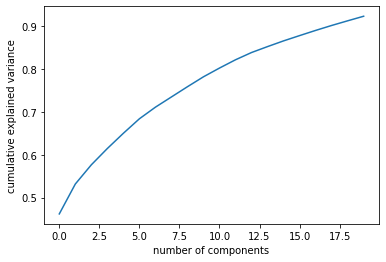

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

Cases Prediction

In [ ]:
X_c = cases_.iloc[:, 0:20]
y_c = cases_[['cases']]
X_train, X_test, y_train, y_test = train_test_split(X_c, y_c, test_size = 0.25, random_state = 21)

In [ ]:
svr = SVR(kernel = 'linear')
# RBF for Grid Search 
C_range = np.logspace(-2,-1,2)
gamma_range = np.logspace(-5,1,2)
param_grid = {'C': C_range, 'gamma': gamma_range}

grid_search = GridSearchCV(svr, param_grid = param_grid, cv=5)
grid_search.fit(X_train, y_train.values.ravel())

# ...
print("The best parameters are %s with a score of %0.2f"
      % (grid_search.best_params_, grid_search.best_score_))

